In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

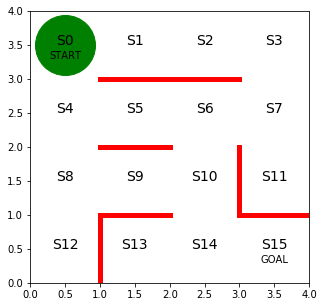

In [6]:
# 초기 상태의 미로 모습

# 전체 그림의 크기 및 그림을 나타내는 변수 선언
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 상태를 의미하는 문자열(S0~S8) 표시
plt.text(0.5, 3.5, 'S0', size=14, ha='center')
plt.text(1.5, 3.5, 'S1', size=14, ha='center')
plt.text(2.5, 3.5, 'S2', size=14, ha='center')
plt.text(3.5, 3.5, 'S3', size=14, ha='center')
plt.text(0.5, 2.5, 'S4', size=14, ha='center')
plt.text(1.5, 2.5, 'S5', size=14, ha='center')
plt.text(2.5, 2.5, 'S6', size=14, ha='center')
plt.text(3.5, 2.5, 'S7', size=14, ha='center')
plt.text(0.5, 1.5, 'S8', size=14, ha='center')
plt.text(1.5, 1.5, 'S9', size=14, ha='center')
plt.text(2.5, 1.5, 'S10', size=14, ha='center')
plt.text(3.5, 1.5, 'S11', size=14, ha='center')
plt.text(0.5, 0.5, 'S12', size=14, ha='center')
plt.text(1.5, 0.5, 'S13', size=14, ha='center')
plt.text(2.5, 0.5, 'S14', size=14, ha='center')
plt.text(3.5, 0.5, 'S15', size=14, ha='center')
plt.text(0.5, 3.3, 'START', ha='center')
plt.text(3.5, 0.3, 'GOAL', ha='center')


# 그림을 그릴 범위 및 눈금 제거 설정
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

line, = ax.plot([0.5], [3.5], marker="o", color='g', markersize=60)

# 붉은 벽 그리기
plt.plot([1, 3], [3, 3], color='red', linewidth=5)
plt.plot([3, 3], [1, 2], color='red', linewidth=5)
plt.plot([1, 2], [2, 2], color='red', linewidth=5)
plt.plot([1, 2], [1, 1], color='red', linewidth=5)
plt.plot([3, 4], [1, 1], color='red', linewidth=5)
plt.plot([1, 1], [0, 1], color='red', linewidth=5)

In [7]:
# 정책을 결정하는 파라미터의 초깃값 theta_0를 설정

# 줄은 상태 0~15, 열은 행동방향(상,우,하,좌 순)를 나타낸다.
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, 1, np.nan, 1],  # s2
                    [np.nan, np.nan, 1, 1],  # s3
                    [1,  1,   1,   np.nan],  # s4
                    [np.nan, 1, np.nan, 1],  # s5
                    [np.nan, 1, 1, 1     ],  # s6
                    [1, np.nan, 1 , 1    ],  # s7
                    [1, 1, 1, np.nan     ],  # s8
                    [np.nan, 1, np.nan, 1],  # s9
                    [1, np.nan, 1, 1     ],  # s10
                    [1, np.nan, np.nan, np.nan],  # s11
                    [1, np.nan, np.nan, np.nan],  # s12
                    [np.nan, 1, np.nan, np.nan],  # s13
                    [1, 1, np.nan, 1],  # s14,               
                                        # s15는 목표지점이므로 정책이 없다
                    ])

In [8]:
# 정책 파라미터 theta를 행동정책 pi로 변환하는 함수


def simple_convert_into_pi_from_theta(theta):
    '''단순히 값의 비율을 계산'''

    [m, n] = theta.shape  # theta의 행렬 크기를 구함
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])  # 비율 계산

    pi = np.nan_to_num(pi)  # nan을 0으로 변환

    return pi

In [9]:
# 초기 정책 pi_0을 계산
pi_0 = simple_convert_into_pi_from_theta(theta_0)

In [10]:
# 초기 정책 pi_0을 출력
pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.        , 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.33333333, 0.        , 0.33333333, 0.33333333],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.        , 0.33333333]])

In [11]:
# 1단계 이동 후의 상태 s를 계산하는 함수


def get_next_s(pi, s):
    direction = ["up", "right", "down", "left"]

    next_direction = np.random.choice(direction, p=pi[s, :])
    # pi[s,;]의 확률에 따라, direction 값이 선택된다

    if next_direction == "up":
        s_next = s - 4  # 위로 이동하면 상태값이 4 줄어든다
    elif next_direction == "right":
        s_next = s + 1  # 오른쪽으로 이동하면 상태값이 1 늘어난다
    elif next_direction == "down":
        s_next = s + 4  # 아래로 이동하면 상태값이 4 늘어난다
    elif next_direction == "left":
        s_next = s - 1  # 왼쪽으로 이동하면 상태값이 1 줄어든다

    return s_next

In [12]:
# 목표 지점에 이를 때까지 에이전트를 계속 이동시키는 함수


def goal_maze(pi):
    s = 0  # 시작 지점
    state_history = [0]  # 에이전트의 경로를 기록하는 리스트

    while (1):  # 목표 지점에 이를 때까지 반복
        next_s = get_next_s(pi, s)
        state_history.append(next_s)  # 경로 리스트에 다음 상태(위치)를 추가

        if next_s == 15:  # 목표 지점에 이르면 종료
            break
        else:
            s = next_s

    return state_history

In [13]:
# 목표 지점에 이를 때까지 미로 안을 이동
state_history = goal_maze(pi_0)

In [14]:
print(state_history)
print("목표 지점에 이르기까지 걸린 단계 수는 " + str(len(state_history) - 1) + "단계입니다")

[0, 4, 0, 4, 5, 6, 10, 6, 10, 6, 7, 11, 7, 6, 7, 6, 7, 6, 7, 11, 7, 11, 7, 11, 7, 3, 2, 1, 2, 3, 7, 3, 7, 11, 7, 3, 7, 6, 5, 6, 10, 9, 10, 6, 10, 9, 8, 12, 8, 12, 8, 4, 5, 6, 10, 14, 10, 14, 15]
목표 지점에 이르기까지 걸린 단계 수는 58단계입니다


In [16]:
# 에이전트의 이동 과정을 시각화
# 참고 URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML


def init():
    '''배경 이미지 초기화'''
    line.set_data([], [])
    return (line,)


def animate(i):
    '''프레임 단위로 이미지 생성'''
    state = state_history[i]  # 현재 위치
    x = (state % 4) + 0.5  # 상태의 x좌표 : 4으로 나눈 나머지 + 0.5
    y = 3.5 - int(state / 4)  # y좌표 : 2.5에서 4으로 나눈 몫을 뺌
    line.set_data(x, y)
    return (line,)


# 초기화 함수와 프레임 단위 이미지 생성함수를 사용하여 애니메이션 생성
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    state_history), interval=200, repeat=False)

HTML(anim.to_jshtml())